<a href="https://colab.research.google.com/github/josejulianhidayat/Analisis_Marketing_Campaign/blob/main/Klasifikasi_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Memuat dataset hasil clustering
file_path = 'hasil_clustering.csv'  # Sesuaikan nama file jika berbeda
dataset = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama untuk verifikasi
print("Dataset yang Dimuat:")
print(dataset.head())


Dataset yang Dimuat:
         ID  Year_Birth    Income  Kidhome  Teenhome   Recency  MntWines  \
0  0.194263    0.592233  0.067095      0.5       0.5  0.383838  0.007368   
1  0.370029    0.699029  0.105097      0.0       0.0  0.262626  0.285332   
2  0.552408    0.883495  0.037471      0.5       0.0  0.262626  0.007368   
3  0.475739    0.854369  0.085065      0.5       0.0  0.949495  0.115874   
4  0.665356    0.718447  0.091412      0.0       0.5  0.161616  0.348292   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Dt_Customer_636  \
0   0.005025         0.003478         0.007722  ...            False   
1   0.246231         0.073623         0.428571  ...            False   
2   0.020101         0.011594         0.038610  ...            False   
3   0.216080         0.068406         0.177606  ...            False   
4   0.211055         0.056812         0.000000  ...            False   

   Dt_Customer_637  Dt_Customer_638  Dt_Customer_639  Dt_Customer_640  \
0            Fal

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan label (y)
X = dataset.drop(columns=['Cluster'])  # 'Cluster' adalah label hasil clustering
y = dataset['Cluster']

# Memisahkan data menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi bentuk data
print("Data Training:")
print(f"Fitur: {X_train.shape}, Label: {y_train.shape}")
print("\nData Testing:")
print(f"Fitur: {X_test.shape}, Label: {y_test.shape}")


Data Training:
Fitur: (1524, 681), Label: (1524,)

Data Testing:
Fitur: (382, 681), Label: (382,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [23]:
!pip install imbalanced-learn


In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalisasi data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# PCA untuk reduksi dimensi
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Clustering dengan KMeans
kmeans = KMeans(n_clusters=8, random_state=42)
new_labels = kmeans.fit_predict(X_pca)

# Tambahkan label baru ke dataset
dataset['New_Cluster'] = new_labels

# Gunakan New_Cluster sebagai target
X_new = dataset.drop(columns=['Cluster', 'New_Cluster'])
y_new = dataset['New_Cluster']

# Split data untuk klasifikasi ulang
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.25, random_state=42, stratify=y_new)


In [34]:
# Combine features and labels for undersampling
train_data = pd.concat([pd.DataFrame(X_train_new), pd.Series(y_train_new, name='New_Cluster')], axis=1)

# Perform undersampling
undersampled_data = train_data.groupby('New_Cluster', group_keys=False).apply(
    lambda x: x.sample(train_data['New_Cluster'].value_counts().min(), random_state=42)
)

# Separate features and labels after undersampling
X_train_new_balanced = undersampled_data.drop(columns=['New_Cluster']).values
y_train_new_balanced = undersampled_data['New_Cluster'].values

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
model.fit(X_train_new_balanced, y_train_new_balanced)

# Evaluate the model
y_pred_new = model.predict(X_test_new)
accuracy_new = accuracy_score(y_test_new, y_pred_new)
classification_report_new = classification_report(y_test_new, y_pred_new)

print("Accuracy:", accuracy_new)
print("Classification Report:\n", classification_report_new)


<ipython-input-34-0724000f79a5>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  undersampled_data = train_data.groupby('New_Cluster', group_keys=False).apply(


Accuracy: 0.9901719901719902
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      1.00      1.00        42
           2       1.00      0.99      0.99        69
           3       1.00      1.00      1.00        37
           4       1.00      0.98      0.99        41
           5       0.98      0.97      0.97        60
           6       0.98      1.00      0.99        60
           7       1.00      1.00      1.00        54

    accuracy                           0.99       407
   macro avg       0.99      0.99      0.99       407
weighted avg       0.99      0.99      0.99       407



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9901719901719902

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      1.00      1.00        42
           2       1.00      0.99      0.99        69
           3       1.00      1.00      1.00        37
           4       1.00      0.98      0.99        41
           5       0.98      0.97      0.97        60
           6       0.98      1.00      0.99        60
           7       1.00      1.00      1.00        54

    accuracy                           0.99       407
   macro avg       0.99      0.99      0.99       407
weighted avg       0.99      0.99      0.99       407



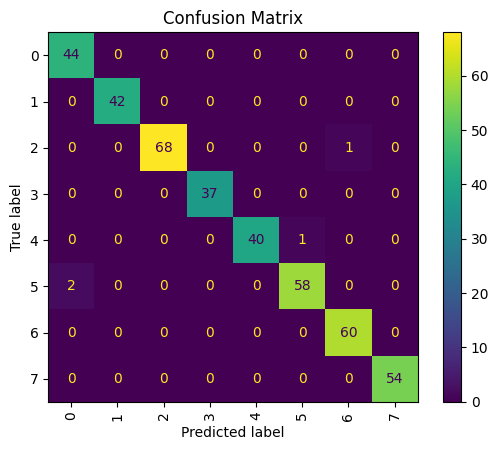

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prediksi pada data uji
y_pred = model.predict(X_test_new)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test_new, y_pred)
classification_report_text = classification_report(y_test_new, y_pred)
conf_matrix = confusion_matrix(y_test_new, y_pred)

# Tampilkan metrik evaluasi
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report_text)

# Visualisasi Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definisikan model
model = RandomForestClassifier(random_state=42)

# Hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300],  # Jumlah pohon dalam hutan
    'max_depth': [10, 20, 30, None],  # Kedalaman maksimal pohon
    'min_samples_split': [2, 5, 10],  # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4],    # Minimum sampel pada daun
    'max_features': ['sqrt', 'log2', None]  # Fitur maksimal yang dipertimbangkan untuk split
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Latih model dengan GridSearch
grid_search.fit(X_train_new_balanced, y_train_new_balanced)

# Cetak parameter terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Gunakan model terbaik untuk prediksi pada data uji
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_new)

# Evaluasi model terbaik
accuracy_best = accuracy_score(y_test_new, y_pred_best)
classification_report_best = classification_report(y_test_new, y_pred_best)

print("Accuracy (Best Model):", accuracy_best)
print("\nClassification Report (Best Model):")
print(classification_report_best)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.989955332091311
Accuracy (Best Model): 0.9901719901719902

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       0.98      1.00      0.99        42
           2       1.00      0.99      0.99        69
           3       1.00      1.00      1.00        37
           4       1.00      0.98      0.99        41
           5       1.00      0.97      0.98        60
           6       1.00      1.00      1.00        60
           7       0.98      1.00      0.99        54

    accuracy                           0.99       407
   macro avg       0.99      0.99      0.99       407
weighted avg       0.99      0.99      0.99       407



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### Analisis Hasil Evaluasi Model Klasifikasi

Analisis Hasil Evaluasi Model Klasifikasi
---

_____________________
Performa Model
---
Berdasarkan hasil evaluasi, model Random Forest Classifier yang telah dituning dengan GridSearchCV menunjukkan performa yang sangat baik, dengan metrik sebagai berikut:

Akurasi: 99.01%
Akurasi menunjukkan proporsi prediksi yang benar dibandingkan dengan total prediksi. Dengan akurasi mendekati 100%, model memiliki kemampuan prediksi yang sangat andal.
Precision, Recall, dan F1-Score:
Precision, Recall, dan F1-Score untuk setiap kelas mendekati 1, yang menunjukkan bahwa model mampu mengklasifikasikan data dengan baik di setiap kelas tanpa bias terhadap kelas tertentu.

----------------
Hasil Evaluasi Klasifikasi
----
Precision:

Mengukur kemampuan model dalam memberikan prediksi positif yang benar. Model memiliki nilai precision tinggi untuk semua kelas, yang berarti prediksi positif sangat akurat.
Recall:

Menunjukkan seberapa baik model mengidentifikasi semua data positif. Dengan nilai recall mendekati 1 di semua kelas, model memiliki cakupan prediksi yang luas dan dapat menangkap hampir semua data yang benar.
F1-Score:

Merupakan rata-rata harmonis antara precision dan recall. Nilai F1-Score tinggi di semua kelas menunjukkan bahwa model memiliki keseimbangan yang baik antara presisi dan cakupan prediksi.

----
Best Parameters (Hasil Tuning Hyperparameter)
---
Setelah proses tuning hyperparameter menggunakan GridSearchCV, berikut adalah parameter terbaik yang ditemukan:

max_depth: None (tidak ada batas kedalaman pohon).
max_features: log2 (menggunakan logaritma basis 2 untuk jumlah fitur).
min_samples_leaf: 1 (minimal satu sampel di setiap daun pohon).
min_samples_split: 10 (minimal 10 sampel untuk melakukan split).
n_estimators: 200 (menggunakan 200 pohon dalam ensemble).
Parameter ini memastikan bahwa model bekerja secara optimal dengan overfitting yang minimal.

---
Confusion Matrix
---
Sebagian besar prediksi berada di diagonal, yang menunjukkan bahwa model memprediksi kelas dengan sangat akurat.
Hampir tidak ada kesalahan prediksi antar kelas.